<a href="https://colab.research.google.com/github/faijurrahman/AI/blob/main/Statistics/Multiple_Linear_Regression_in_Python_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Source: https://colab.research.google.com/drive/155PABnayG3fKlS_14SsZXzJtEHEnramT?usp=sharing
#Video: https://www.youtube.com/watch?v=KYNuzfn5Fx0&list=PLKYEe2WisBTHOxrEG_COAgJTWnceouhRm&index=2&ab_channel=GregHogg
import numpy as np
import pandas as pd

df = pd.read_csv('sample_data/california_housing_train.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
...,...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571,111400.0
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179,79000.0
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313,103600.0
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797,85800.0


In [2]:
df.corr()['total_bedrooms']

longitude             0.071802
latitude             -0.069373
housing_median_age   -0.320434
total_rooms           0.928403
total_bedrooms        1.000000
population            0.881169
households            0.980920
median_income        -0.013495
median_house_value    0.045783
Name: total_bedrooms, dtype: float64

In [3]:
bedrooms = df['total_bedrooms']
df = df.drop(['total_bedrooms', 'longitude', 'latitude', 'housing_median_age', 'median_income', 'median_house_value'], axis=1)
df['bedrooms'] = bedrooms
df

,total_rooms,population,households,bedrooms
0,5612.0,1015.0,472.0,1283.0
1,7650.0,1129.0,463.0,1901.0
2,720.0,333.0,117.0,174.0
3,1501.0,515.0,226.0,337.0
4,1454.0,624.0,262.0,326.0
...,...,...,...,...
16995,2217.0,907.0,369.0,394.0
16996,2349.0,1194.0,465.0,528.0
16997,2677.0,1244.0,456.0,531.0
16998,2672.0,1298.0,478.0,552.0


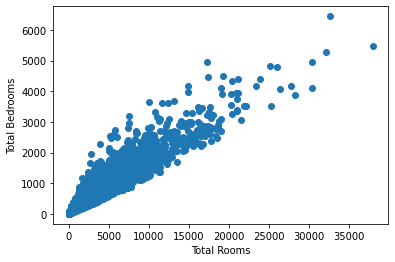

In [4]:
import matplotlib.pyplot as plt

plt.scatter(df['total_rooms'], df['bedrooms'])
plt.xlabel('Total Rooms')
plt.ylabel('Total Bedrooms')
plt.show()

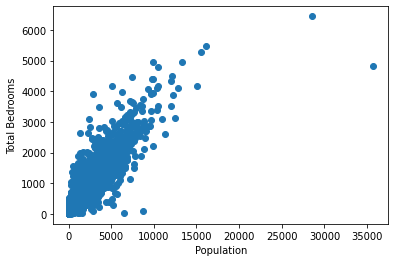

In [5]:
plt.scatter(df['population'], df['bedrooms'])
plt.xlabel('Population')
plt.ylabel('Total Bedrooms')
plt.show()

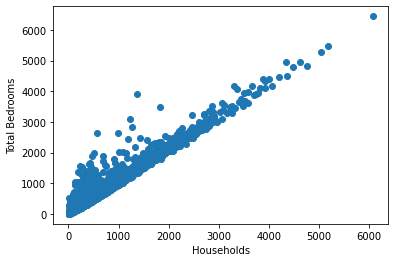

In [6]:
plt.scatter(df['households'], df['bedrooms'])
plt.xlabel('Households')
plt.ylabel('Total Bedrooms')
plt.show()

In [7]:
df_np = df.to_numpy()
df_np.shape

(17000, 4)

In [8]:
X_train, y_train = df_np[:, :3], df_np[:, -1]
X_train.shape, y_train.shape

((17000, 3), (17000,))

In [9]:
X_train


array([[5612., 1015.,  472.],
       [7650., 1129.,  463.],
       [ 720.,  333.,  117.],
       ...,
       [2677., 1244.,  456.],
       [2672., 1298.,  478.],
       [1820.,  806.,  270.]])

In [10]:
y_train

array([1283., 1901.,  174., ...,  531.,  552.,  300.])

In [11]:
from sklearn.linear_model import LinearRegression

sklearn_model = LinearRegression().fit(X_train, y_train)
sklearn_y_predictions = sklearn_model.predict(X_train)
sklearn_y_predictions

array([631.82986004, 693.11956219, 130.849378  , ..., 502.56126019,
       522.07260277, 304.4499167 ])

In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mean_absolute_error(sklearn_y_predictions, y_train), mean_squared_error(sklearn_y_predictions, y_train)

(39.672217650706656, 5650.631822167879)

In [13]:
predictions_df = pd.DataFrame({'Population': df['population'],
                               'Households': df['households'],
                               'Total Rooms': df['total_rooms'],
                               'Bedrooms': df['bedrooms'],
                               'Sklearn Bedroom Predictions':sklearn_y_predictions})
predictions_df

,Population,Households,Total Rooms,Bedrooms,Sklearn Bedroom Predictions
0,1015.0,472.0,5612.0,1283.0,631.829860
1,1129.0,463.0,7650.0,1901.0,693.119562
2,333.0,117.0,720.0,174.0,130.849378
3,515.0,226.0,1501.0,337.0,259.462982
4,624.0,262.0,1454.0,326.0,289.315311
...,...,...,...,...,...
16995,907.0,369.0,2217.0,394.0,412.047168
16996,1194.0,465.0,2349.0,528.0,501.086730
16997,1244.0,456.0,2677.0,531.0,502.561260
16998,1298.0,478.0,2672.0,552.0,522.072603


In [14]:
# Assuming total_bedrooms[i] = alpha + (beta_1 * population[i]) + (beta_2 * households[i]) + (beta_3 * total_rooms[i]) + error
# Generally: y[i] = alpha + (beta_1 * x_1[i]) + (beta_2 * x_2[i]) + (beta_3 * x_3[i]) + error
# Model:     y_hat[i] = alpha_hat + (beta_1_hat * x_1[i]) + (beta_2_hat * x_2[i]) + (beta_3_hat * x_3[i])

def get_predictions(model, X):
  '''
  Obtain the predictions for the given model and inputs.

  model: np.array of Floats with shape (p,) of parameters
  X: np.array of Floats with shape (n, p-1) of inputs
  
  Returns: np.array of Floats with shape (n,).
  '''

  (n, p_minus_one) = X.shape
  p = p_minus_one + 1

  new_X = np.ones(shape=(n, p))
  new_X[:, 1:] = X

  return np.dot(new_X, model)

In [15]:
test_model = np.array([1, 1/4, 1/3, 1.2])
get_predictions(test_model, X_train).shape

(17000,)

In [26]:
X = X_train
(n, p_minus_one) = X.shape
p = p_minus_one + 1
new_X = np.ones(shape=(n, p))
new_X[:, 1:] = X
np.dot(new_X, test_model)

array([2308.73333333, 2845.43333333,  432.4       , ..., 1632.11666667,
       1675.26666667, 1048.66666667])

In [ ]:
predictions_df['Test Predictions'] = get_predictions(test_model, X_train)
predictions_df

,Population,Households,Total Rooms,Bedrooms,Sklearn Bedroom Predictions,Test Predictions
0,1015.0,472.0,5612.0,1283.0,631.829860,2308.733333
1,1129.0,463.0,7650.0,1901.0,693.119562,2845.433333
2,333.0,117.0,720.0,174.0,130.849378,432.400000
3,515.0,226.0,1501.0,337.0,259.462982,819.116667
4,624.0,262.0,1454.0,326.0,289.315311,886.900000
...,...,...,...,...,...,...
16995,907.0,369.0,2217.0,394.0,412.047168,1300.383333
16996,1194.0,465.0,2349.0,528.0,501.086730,1544.250000
16997,1244.0,456.0,2677.0,531.0,502.561260,1632.116667
16998,1298.0,478.0,2672.0,552.0,522.072603,1675.266667


In [ ]:
mean_absolute_error(predictions_df['Test Predictions'], y_train)

1861.4123588235295

In [ ]:
from numpy.linalg import inv

def get_best_model(X, y):
  '''
  Returns the model with the parameters that minimize the MSE.

  X: np.array of Floats with shape (n, p-1) of inputs
  y: np.array of Floats with shape (n,) of observed outputs

  Returns: np.array of shape (p,) representing the model.
  '''

  (n, p_minus_one) = X.shape
  p = p_minus_one + 1

  new_X = np.ones(shape=(n, p))
  new_X[:, 1:] = X

  return np.dot(np.dot(inv(np.dot(new_X.T, new_X)), new_X.T), y)

In [ ]:
best_model = get_best_model(X_train, y_train)
predictions_df['Best Predictions'] = get_predictions(best_model, X_train)
predictions_df

,Population,Households,Total Rooms,Bedrooms,Sklearn Bedroom Predictions,Test Predictions,Best Predictions
0,1015.0,472.0,5612.0,1283.0,631.829860,2308.733333,631.829860
1,1129.0,463.0,7650.0,1901.0,693.119562,2845.433333,693.119562
2,333.0,117.0,720.0,174.0,130.849378,432.400000,130.849378
3,515.0,226.0,1501.0,337.0,259.462982,819.116667,259.462982
4,624.0,262.0,1454.0,326.0,289.315311,886.900000,289.315311
...,...,...,...,...,...,...,...
16995,907.0,369.0,2217.0,394.0,412.047168,1300.383333,412.047168
16996,1194.0,465.0,2349.0,528.0,501.086730,1544.250000,501.086730
16997,1244.0,456.0,2677.0,531.0,502.561260,1632.116667,502.561260
16998,1298.0,478.0,2672.0,552.0,522.072603,1675.266667,522.072603


In [ ]:
mean_absolute_error(predictions_df['Best Predictions'], y_train), mean_squared_error(predictions_df['Best Predictions'], y_train)

(39.67221765070642, 5650.631822167879)